In [3]:
!pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 7.4 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spectral
import spectral.io.envi as envi

In [12]:
# Read the envi files
# Replace the file path with the address in your drive.
cup_95_hsi_data = envi.open('/content/drive/MyDrive/InGARSS 2025 HSI Tutorial    /cup95eff.hdr','/content/drive/MyDrive/InGARSS 2025 HSI Tutorial    /cup95eff.int')


In [15]:
# Load into numpy
hsi_data = cup_95_hsi_data.load()

In [16]:
hsi_data.shape

(350, 400, 50)

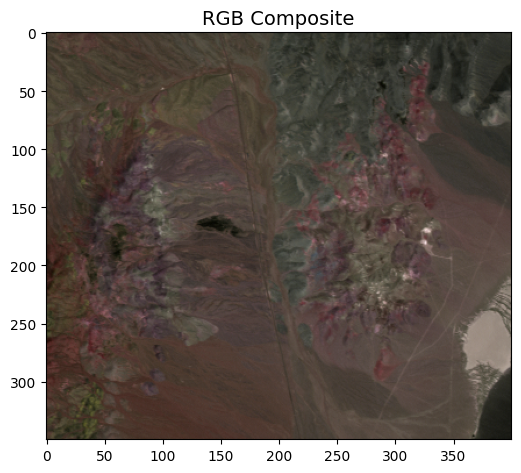

In [21]:
# Display the data
# Visualizing Hyperspectral Image extracting 3 RGB channels

# Select bands for RGB
red_band = 11
green_band = 21
blue_band = 35

rgb_image = np.dstack((
    hsi_data[:, :, red_band],
    hsi_data[:, :, green_band],
    hsi_data[:, :, blue_band]
))

# Normalize for display
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title('RGB Composite', fontsize=14)
plt.show()


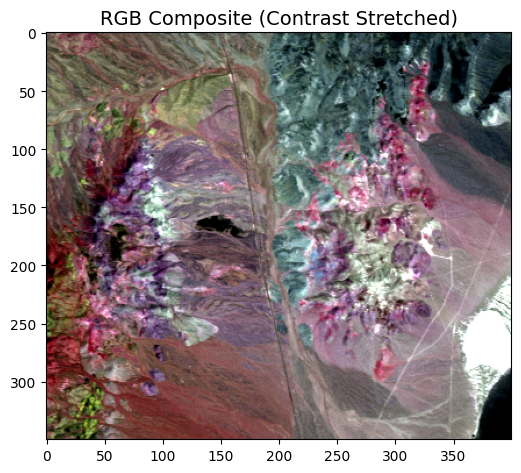

In [22]:
# For better visualization, use Contrast Stretching (2–98% Percentile)
def contrast_stretch(img, low=2, high=98):
    p_low, p_high = np.percentile(img, (low, high))
    stretched = (img - p_low) / (p_high - p_low)
    stretched = np.clip(stretched, 0, 1)
    return stretched

# Apply per band
rgb_stretched = np.zeros_like(rgb_image, dtype=float)
for i in range(3):
    rgb_stretched[:, :, i] = contrast_stretch(rgb_image[:, :, i])

# Display
plt.figure(figsize=(6, 6))
plt.imshow(rgb_stretched)
plt.title("RGB Composite (Contrast Stretched)", fontsize=14)
plt.show()



In [19]:
# Write a function to perfrom k-means clustering algorithm
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, n_clusters=5):
    """
    Performs K-means clustering on hyperspectral data and visualizes the results.

    Args:
        data (numpy.ndarray): The hyperspectral data (H x W x Bands).
        n_clusters (int): The number of clusters to form.

    Returns:
        numpy.ndarray: The clustered labels reshaped to the original image dimensions.
    """
    # Reshape the data for K-means (pixels x bands)
    h, w, b = data.shape
    data_reshaped = data.reshape(h * w, b)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_reshaped)
    labels = kmeans.labels_

    # Reshape the labels back to the original image dimensions
    clustered_image = labels.reshape(h, w)

    # Visualize the clustered image
    plt.figure(figsize=(8, 8))
    plt.imshow(clustered_image, cmap='nipy_spectral')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters', fontsize=14)
    plt.colorbar(label='Cluster ID')
    plt.show()

    return clustered_image

### K-Means Clustering Function

The `perform_kmeans_clustering` function takes the `hsi_data` (hyperspectral image data) and the desired `n_clusters` as input. It reshapes the 3D data into a 2D array suitable for K-means, applies the clustering algorithm, and then reshapes the resulting cluster labels back into the original image dimensions. Finally, it visualizes the clustered image.

Let's apply this function to our `hsi_data` with a specified number of clusters (e.g., 10 clusters).

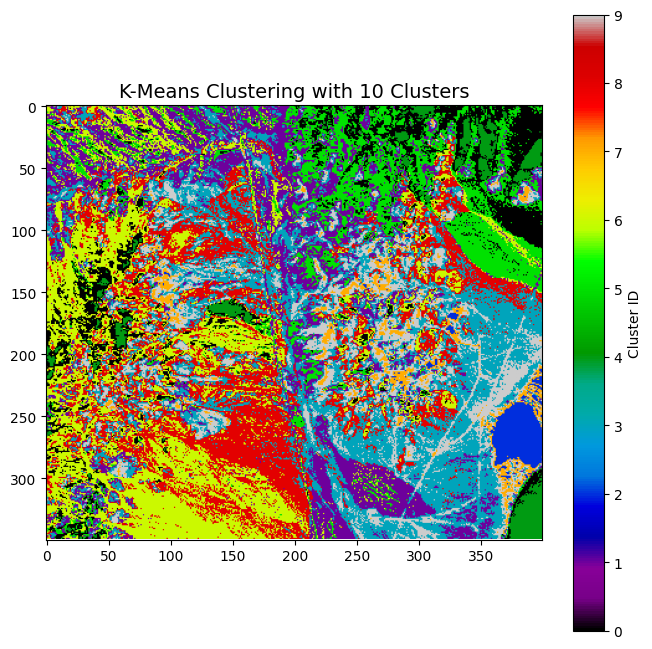

In [26]:
# Example usage:
# Perform K-means clustering with 10 clusters
k_clustered_image = perform_kmeans_clustering(hsi_data, n_clusters=10)